In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"cardio_train1.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


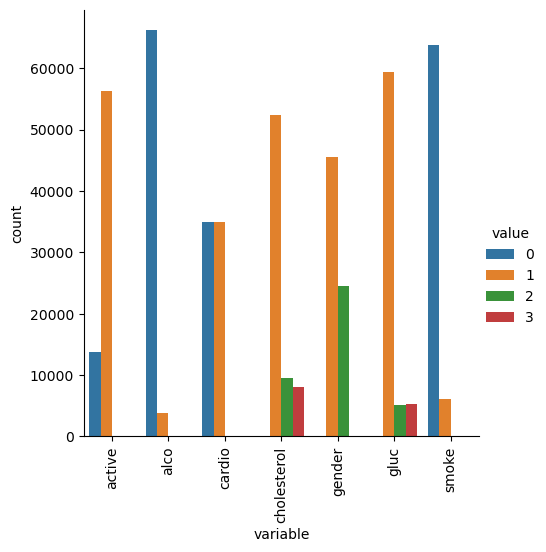

In [10]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


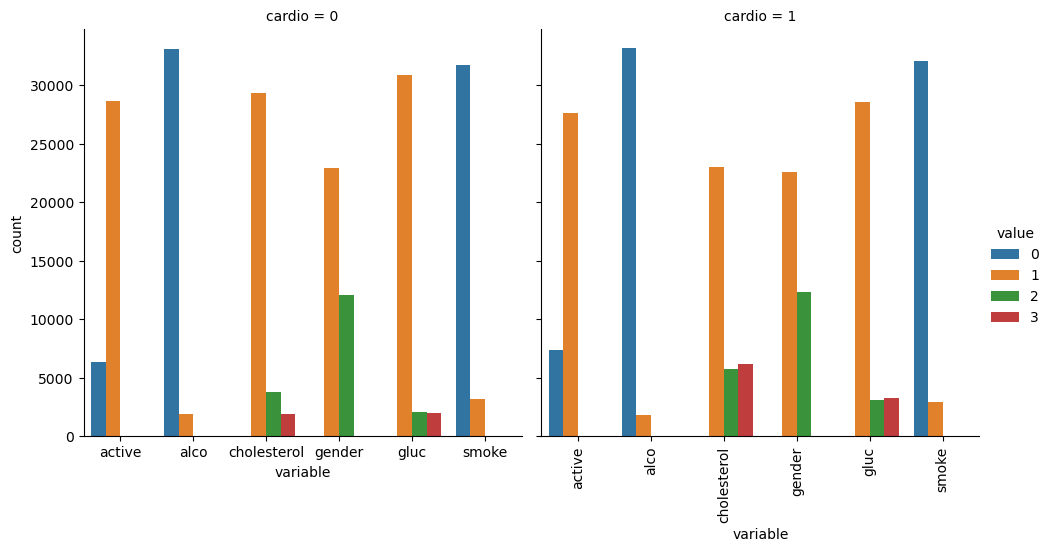

In [11]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar"
)
plt.xticks(rotation='vertical');

In [12]:
df.groupby("gender")["height"].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [13]:
df.groupby("gender")["alco"].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

In [14]:
df.groupby("gender")["smoke"].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [15]:
df.groupby("smoke")["age"].median() / 365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [17]:
df["BMI"] = df["weight"] / (df["height"] / 100) ** 2

In [18]:
df["BMI"].median()

26.374068120774975

In [19]:
df.groupby("gender")["BMI"].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [20]:
df.groupby(["gender", "alco", "cardio"])["BMI"].median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

In [22]:
df_to_remove = df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]
print(df_to_remove.shape[0] / df.shape[0])

filtered_df = df[~df.index.isin(df_to_remove)]

0.0963


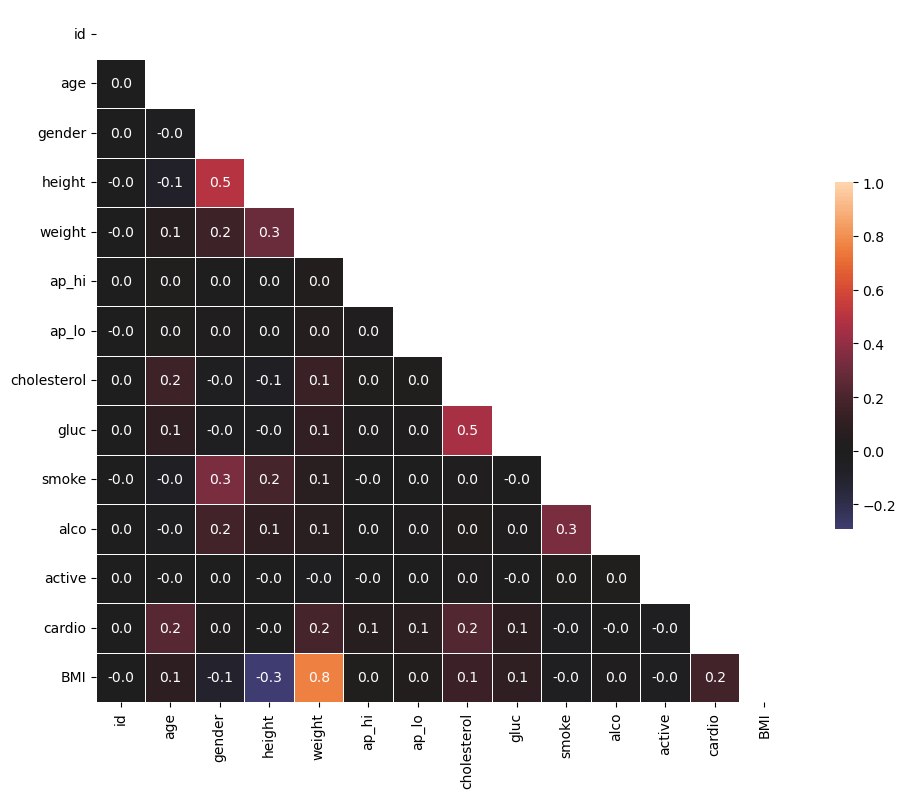

In [23]:
# correlation matrix
df = filtered_df.copy()

corr = df.corr(method="pearson")


mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


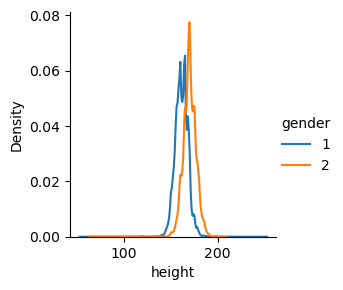

In [24]:
sns.FacetGrid(df, hue="gender").map(sns.kdeplot, "height").add_legend();

In [26]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [3]:
y=df.iloc[:,12:13]
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [4]:
x=df.iloc[:,7:12]
x

,cholesterol,gluc,smoke,alco,active
0,1,1,0,0,1
1,3,1,0,0,1
2,3,1,0,0,0
3,1,1,0,0,1
4,1,1,0,0,0
...,...,...,...,...,...
69995,1,1,1,0,1
69996,2,2,0,0,1
69997,3,1,0,1,0
69998,1,2,0,0,0


# KNN

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [33]:
len(xtrain)

56000

In [34]:
xtrain

,cholesterol,gluc,smoke,alco,active
58018,1,1,0,0,0
26857,3,1,0,0,1
12527,1,1,0,0,1
11223,3,1,1,0,1
27644,1,1,0,0,0
...,...,...,...,...,...
4542,1,1,0,1,1
1603,1,1,0,1,1
19078,1,1,0,0,1
56411,1,1,0,0,1


In [35]:
ytrain

,cardio
58018,0
26857,0
12527,1
11223,1
27644,1
...,...
4542,0
1603,0
19078,0
56411,0


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=6)

In [41]:
knn_model.fit(xtrain,ytrain)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [42]:
knn_model.predict(xtest)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
knn_model.score(xtest,ytest)

0.5656428571428571

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(xtrain,ytrain)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [45]:
model3.score(xtest,ytest)

0.5885714285714285

In [46]:
predicted_result=model3.predict(xtest)
predicted_result

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Naive Beyes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model4=BernoulliNB()

In [ ]:
model4.fit(xtrain,ytrain)

In [ ]:
model4.predict(xtest)

In [ ]:
ans=model4.predict(xtest)

In [ ]:
model4.score(xtest,ytest)

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()

In [53]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [54]:
model2.predict(xtest)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
model2.score(xtest,ytest)

0.5889285714285715

[Text(0.41448643410852715, 0.9375, 'x[0] <= 1.5\ngini = 0.5\nsamples = 56000\nvalue = [28019, 27981]'),
 Text(0.15891472868217055, 0.8125, 'x[4] <= 0.5\ngini = 0.493\nsamples = 41976\nvalue = [23502, 18474]'),
 Text(0.07364341085271318, 0.6875, 'x[1] <= 1.5\ngini = 0.5\nsamples = 8290\nvalue = [4243, 4047]'),
 Text(0.031007751937984496, 0.5625, 'x[3] <= 0.5\ngini = 0.499\nsamples = 7719\nvalue = [3993, 3726]'),
 Text(0.015503875968992248, 0.4375, 'x[2] <= 0.5\ngini = 0.499\nsamples = 7438\nvalue = [3843, 3595]'),
 Text(0.007751937984496124, 0.3125, 'gini = 0.499\nsamples = 7059\nvalue = [3643, 3416]'),
 Text(0.023255813953488372, 0.3125, 'gini = 0.498\nsamples = 379\nvalue = [200, 179]'),
 Text(0.046511627906976744, 0.4375, 'x[2] <= 0.5\ngini = 0.498\nsamples = 281\nvalue = [150, 131]'),
 Text(0.03875968992248062, 0.3125, 'gini = 0.489\nsamples = 131\nvalue = [75, 56]'),
 Text(0.05426356589147287, 0.3125, 'gini = 0.5\nsamples = 150\nvalue = [75, 75]'),
 Text(0.11627906976744186, 0.5625

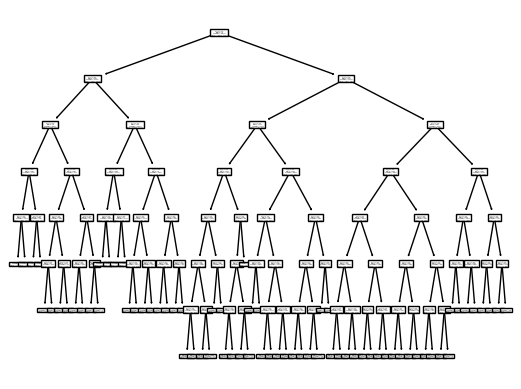

In [56]:
from sklearn import tree
tree.plot_tree(model2)

# Logistic Regression

In [61]:
df1=df

In [62]:
df1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df1[["cholesterol","gluc","smoke","alco","active"]],df1["cardio"],train_size=0.8)

In [64]:
xtrain

,cholesterol,gluc,smoke,alco,active
49255,2,1,0,0,0
27876,3,3,0,0,1
34043,1,2,1,0,1
32758,1,1,0,0,1
37987,1,1,0,0,1
...,...,...,...,...,...
62789,1,3,0,0,1
56576,3,3,0,0,1
3590,1,1,0,0,0
811,3,3,0,0,1


In [65]:
ytrain

49255    1
27876    1
34043    0
32758    1
37987    0
        ..
62789    1
56576    1
3590     1
811      1
57030    1
Name: cardio, Length: 56000, dtype: int64

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model=LogisticRegression()

In [68]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [69]:
model.predict(xtest)

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [70]:
model.score(xtest,ytest)

0.5919285714285715

# SVM

In [ ]:
df

In [6]:
from sklearn.svm import SVC
model=SVC()
model.fit(xtrain,ytrain)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [7]:
model.predict(xtest)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [8]:
model.score(xtest,ytest)

0.5950714285714286